
#**Logistics Data Analysis**

This notebook provides a **comprehensive Exploratory Data Analysis (EDA)** and **descriptive statistics** of the logistics dataset.
It covers data overview, summary statistics, visualization, correlation analysis, and anomaly inspection.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "logistics.csv"  # Ensure the file is in the same directory
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   timestamp                 100000 non-null  object 
 1   machine_id                100000 non-null  int64  
 2   temperature               100000 non-null  float64
 3   vibration                 100000 non-null  float64
 4   humidity                  100000 non-null  float64
 5   pressure                  100000 non-null  float64
 6   energy_consumption        100000 non-null  float64
 7   machine_status            100000 non-null  int64  
 8   anomaly_flag              100000 non-null  int64  
 9   predicted_remaining_life  100000 non-null  int64  
 10  failure_type              100000 non-null  object 
 11  downtime_risk             100000 non-null  float64
 12  maintenance_required      100000 non-null  int64  
dtypes: float64(6), int64(5), object(2)
memory usa

,timestamp,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,failure_type,downtime_risk,maintenance_required
0,2025-01-01 00:00:00,39,78.61,28.65,79.96,3.73,2.16,1,0,106,Normal,0.0,0
1,2025-01-01 00:01:00,29,68.19,57.28,35.94,3.64,0.69,1,0,320,Normal,0.0,0
2,2025-01-01 00:02:00,15,98.94,50.20,72.06,1.00,2.49,1,1,19,Normal,1.0,1
3,2025-01-01 00:03:00,43,90.91,37.65,30.34,3.15,4.96,1,1,10,Normal,1.0,1
4,2025-01-01 00:04:00,8,72.32,40.69,56.71,2.68,0.63,2,0,65,Vibration Issue,0.0,1


## Descriptive Statistics

In [ ]:

# Summary statistics
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
timestamp,100000,100000,2025-03-11 10:23:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
machine_id,100000.0,NaN,NaN,NaN,25.49933,14.389439,1.0,13.0,25.0,38.0,50.0
temperature,100000.0,NaN,NaN,NaN,75.015625,10.031884,35.55,68.2675,75.06,81.75,121.94
vibration,100000.0,NaN,NaN,NaN,50.01227,14.985444,-17.09,39.97,49.96,60.1,113.8
humidity,100000.0,NaN,NaN,NaN,54.995401,14.43796,30.0,42.52,54.98,67.5,80.0
pressure,100000.0,NaN,NaN,NaN,3.000405,1.152399,1.0,2.0,3.01,4.0,5.0
energy_consumption,100000.0,NaN,NaN,NaN,2.747064,1.297865,0.5,1.63,2.74,3.87,5.0
machine_status,100000.0,NaN,NaN,NaN,1.00205,0.446193,0.0,1.0,1.0,1.0,2.0
anomaly_flag,100000.0,NaN,NaN,NaN,0.08916,0.284976,0.0,0.0,0.0,0.0,1.0
predicted_remaining_life,100000.0,NaN,NaN,NaN,234.26916,150.063062,1.0,97.0,230.0,365.0,499.0


## Missing Values

In [ ]:

# Check for missing values
df.isnull().sum().sort_values(ascending=False)


,0
timestamp,0
machine_id,0
temperature,0
vibration,0
humidity,0
pressure,0
energy_consumption,0
machine_status,0
anomaly_flag,0
predicted_remaining_life,0


## Distribution of Key Numerical Features

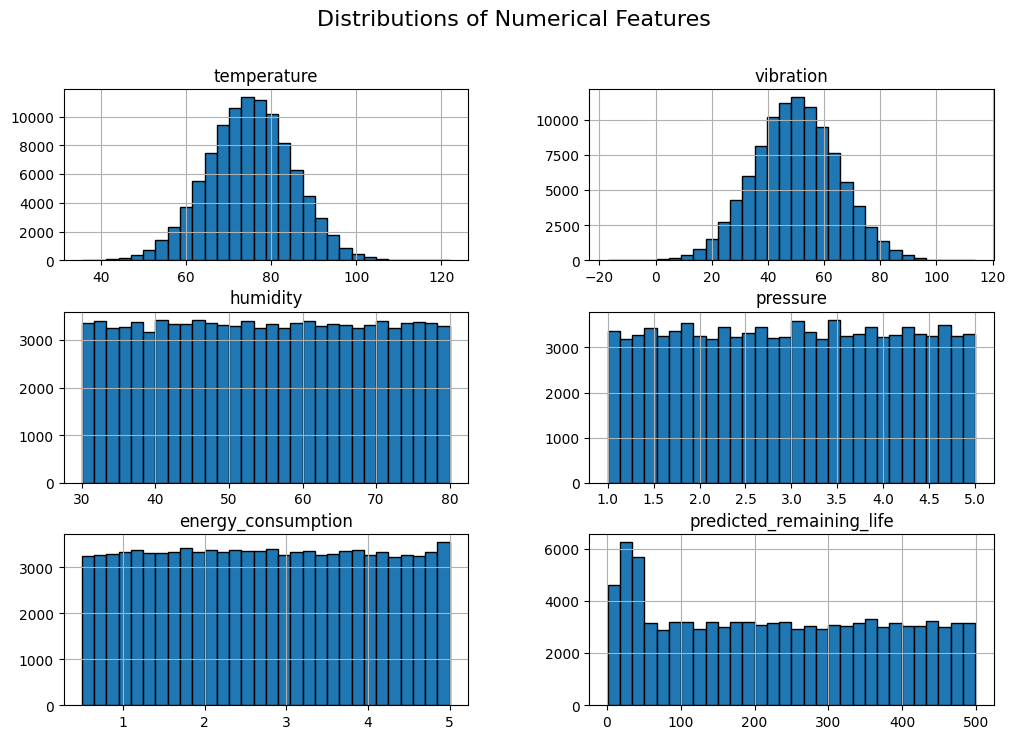

In [ ]:

num_cols = ['temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption', 'predicted_remaining_life']
df[num_cols].hist(bins=30, figsize=(12,8), edgecolor='black')
plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.show()


## Correlation Heatmap

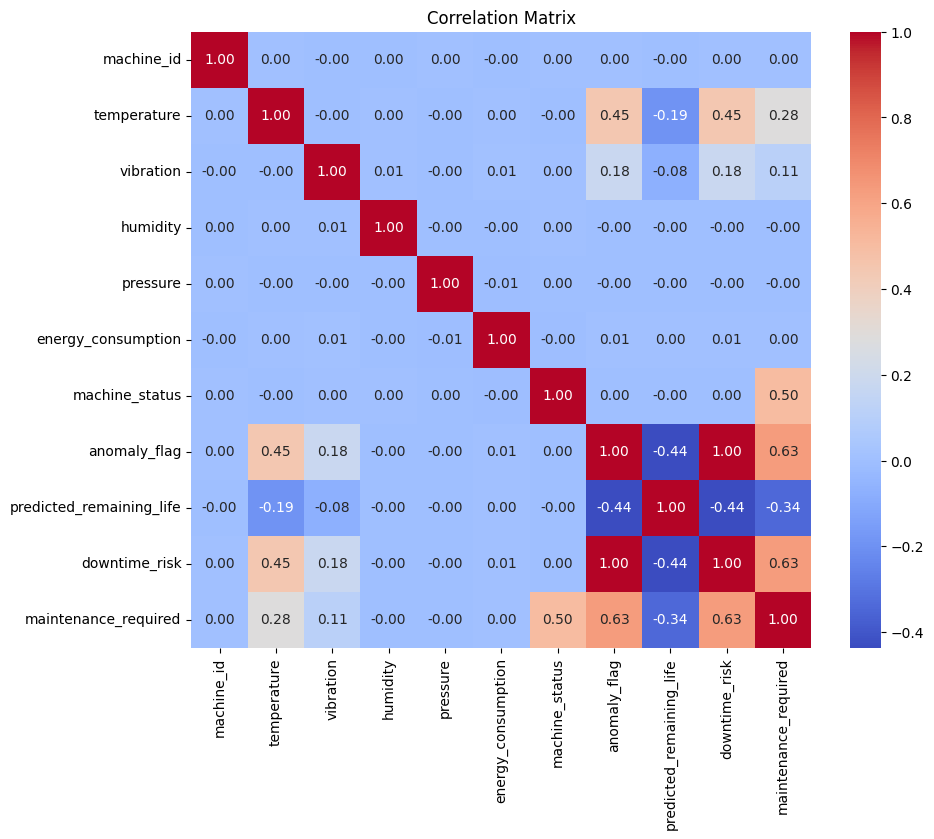

In [ ]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Machine Status and Maintenance Overview

/tmp/ipython-input-2429375799.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, ax=ax[0], palette='Set2')
/tmp/ipython-input-2429375799.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=maintenance_counts.index, y=maintenance_counts.values, ax=ax[1], palette='Set3')


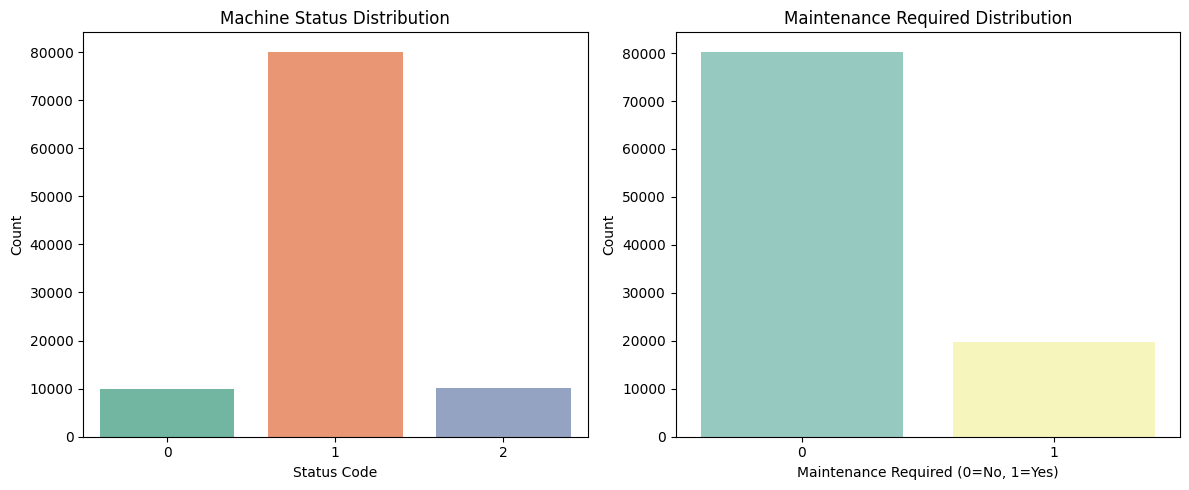

In [ ]:

status_counts = df['machine_status'].value_counts()
maintenance_counts = df['maintenance_required'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Machine status
sns.barplot(x=status_counts.index, y=status_counts.values, ax=ax[0], palette='Set2')
ax[0].set_title('Machine Status Distribution')
ax[0].set_xlabel('Status Code')
ax[0].set_ylabel('Count')

# Maintenance required
sns.barplot(x=maintenance_counts.index, y=maintenance_counts.values, ax=ax[1], palette='Set3')
ax[1].set_title('Maintenance Required Distribution')
ax[1].set_xlabel('Maintenance Required (0=No, 1=Yes)')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


## Failure Type Distribution

/tmp/ipython-input-1198947350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='failure_type', order=df['failure_type'].value_counts().index, palette='viridis')


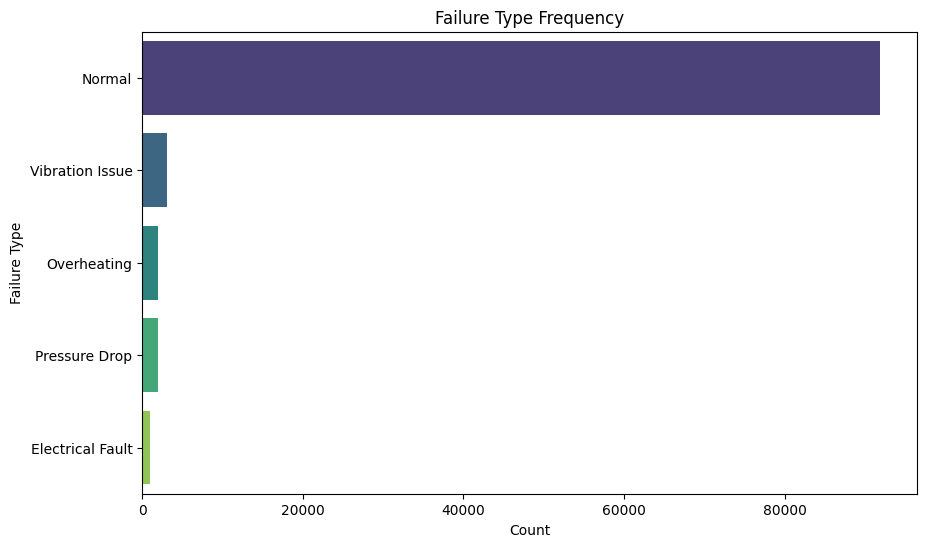

In [ ]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='failure_type', order=df['failure_type'].value_counts().index, palette='viridis')
plt.title('Failure Type Frequency')
plt.xlabel('Count')
plt.ylabel('Failure Type')
plt.show()


## Anomaly Analysis

In [ ]:

# Compare average values for anomaly vs normal
anomaly_stats = df.groupby('anomaly_flag')[['temperature', 'vibration', 'pressure', 'energy_consumption']].mean()
anomaly_stats


,temperature,vibration,pressure,energy_consumption
anomaly_flag,,,,
0,73.612684,49.180599,3.001160,2.744735
1,89.347780,58.508444,2.992692,2.770864


## Correlation with Downtime Risk

In [ ]:

risk_corr = df.corr(numeric_only=True)['downtime_risk'].sort_values(ascending=False)
risk_corr


,downtime_risk
downtime_risk,1.000000
anomaly_flag,0.999998
maintenance_required,0.631726
temperature,0.446980
vibration,0.177452
energy_consumption,0.005743
machine_id,0.003282
machine_status,0.001149
humidity,-0.000641
pressure,-0.002087
